# Classification project: Wisconsin Breast Cancer

- 컴퓨팅파워 좋으면 일다 다해보고 좋은걸 선택하자. (물론 svm은 해석력이 안된다)

## 0. Load libraries

In [25]:
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

%matplotlib inline

## 1. Load the dataset

In [26]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['Code', 'Clump-Thickness', 'Cell-Size', 'Cell-Shape', 'Adhesion', 'Single-Cell-Size', 'Bare-Nuclei', 'Chromatin', 'Nucleoli', 'Mitoses', 'Class']
dataset = pandas.read_csv(url, names=names)

In [27]:
dataset.head(5)

,Code,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,Bare-Nuclei,Chromatin,Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## 2. Data preprocessing 

- 이거 하기전에 데이터의 형태를 살펴봐야 한다.
- ? 제거
- 전처리 위해 FLOAT형 바꿈

In [28]:
# delete code
dataset.drop('Code', axis=1, inplace=True)
# mark ? as NaN
dataset['Bare-Nuclei'] = dataset['Bare-Nuclei'].replace('?', numpy.NaN) 
# Convert the type of 'Bare-Nuclei' column as float
dataset['Bare-Nuclei'] = dataset['Bare-Nuclei'].astype(float)
# Drop NaN
dataset.dropna(axis=0, how='any', inplace=True)

In [29]:
dataset.head(5)

,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,Bare-Nuclei,Chromatin,Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


## 3. Data summarization

In [30]:
# shape
print(dataset.shape)

(683, 10)


In [31]:
# types
print(dataset.dtypes) # 변수 유형이 잘못된게 없는지 확인할 것

Clump-Thickness       int64
Cell-Size             int64
Cell-Shape            int64
Adhesion              int64
Single-Cell-Size      int64
Bare-Nuclei         float64
Chromatin             int64
Nucleoli              int64
Mitoses               int64
Class                 int64
dtype: object


In [32]:
# descriptions, change precision to 3 places
pandas.set_option('precision', 3)
pandas.set_option('display.width', 200)
print(dataset.describe()) # 각 변수들 기초 통계량 확인

       Clump-Thickness  Cell-Size  Cell-Shape  Adhesion  Single-Cell-Size  Bare-Nuclei  Chromatin  Nucleoli  Mitoses    Class
count          683.000    683.000     683.000   683.000           683.000      683.000    683.000   683.000  683.000  683.000
mean             4.442      3.151       3.215     2.830             3.234        3.545      3.445     2.870    1.603    2.700
std              2.821      3.065       2.989     2.865             2.223        3.644      2.450     3.053    1.733    0.955
min              1.000      1.000       1.000     1.000             1.000        1.000      1.000     1.000    1.000    2.000
25%              2.000      1.000       1.000     1.000             2.000        1.000      2.000     1.000    1.000    2.000
50%              4.000      1.000       1.000     1.000             2.000        1.000      3.000     1.000    1.000    2.000
75%              6.000      5.000       5.000     4.000             4.000        6.000      5.000     4.000    1.000  

In [33]:
# class distribution
print(dataset.groupby('Class').size())

Class
2    444
4    239
dtype: int64


In [34]:
# correlation
print(dataset.corr(method='pearson'))

                  Clump-Thickness  Cell-Size  Cell-Shape  Adhesion  Single-Cell-Size  Bare-Nuclei  Chromatin  Nucleoli  Mitoses  Class
Clump-Thickness             1.000      0.642       0.653     0.488             0.524        0.593      0.554     0.534    0.351  0.715
Cell-Size                   0.642      1.000       0.907     0.707             0.754        0.692      0.756     0.719    0.461  0.821
Cell-Shape                  0.653      0.907       1.000     0.686             0.722        0.714      0.735     0.718    0.441  0.822
Adhesion                    0.488      0.707       0.686     1.000             0.595        0.671      0.669     0.603    0.419  0.706
Single-Cell-Size            0.524      0.754       0.722     0.595             1.000        0.586      0.618     0.629    0.481  0.691
Bare-Nuclei                 0.593      0.692       0.714     0.671             0.586        1.000      0.681     0.584    0.339  0.823
Chromatin                   0.554      0.756       0.73

## 4. Data visualization

In [35]:
# Determine the size of figures made by pyplot
plt.rcParams['figure.figsize'] = (15,15)

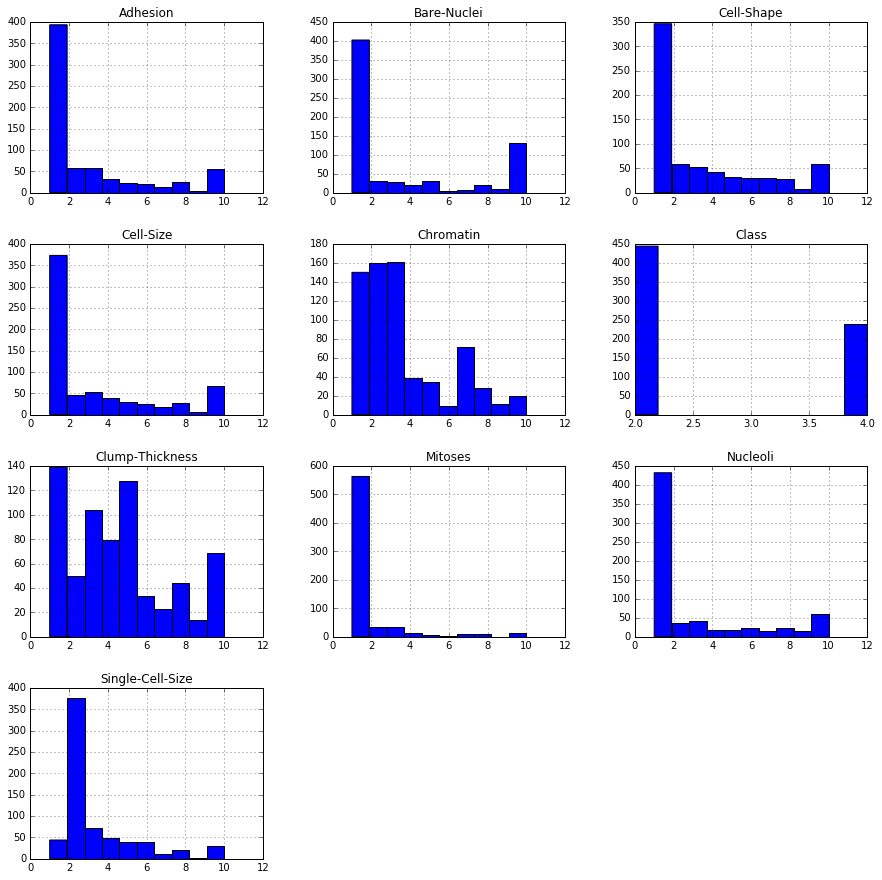

In [36]:
# histograms
dataset.hist()
plt.show()

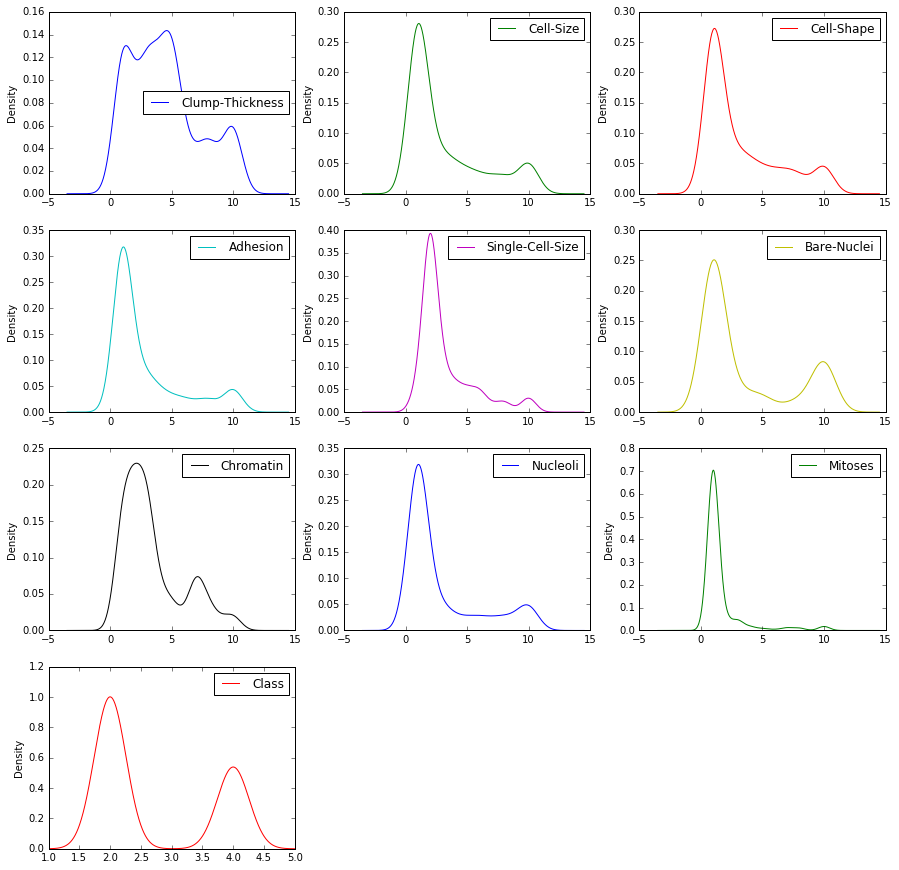

In [37]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

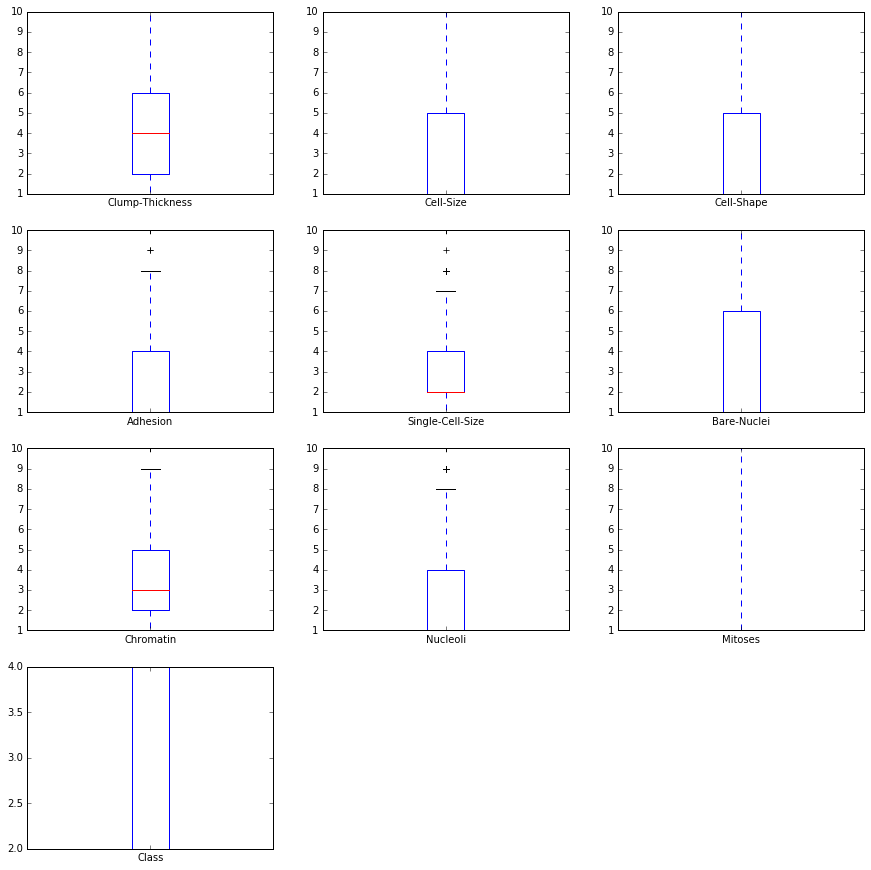

In [38]:
# box plots
dataset.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
plt.show()

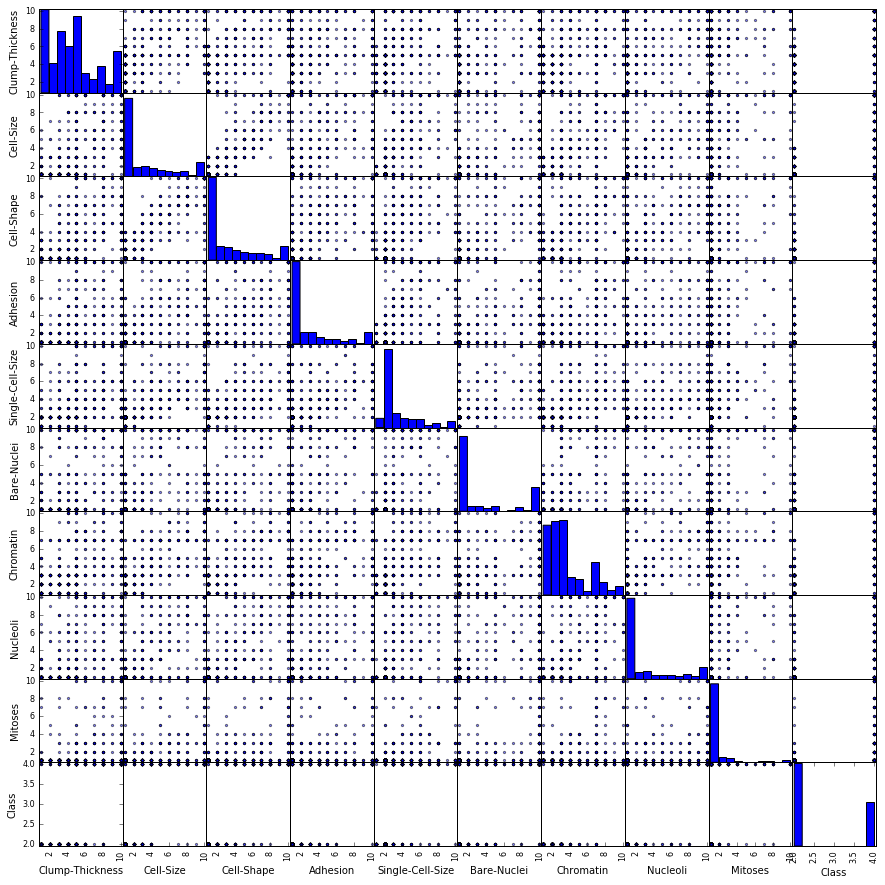

In [39]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

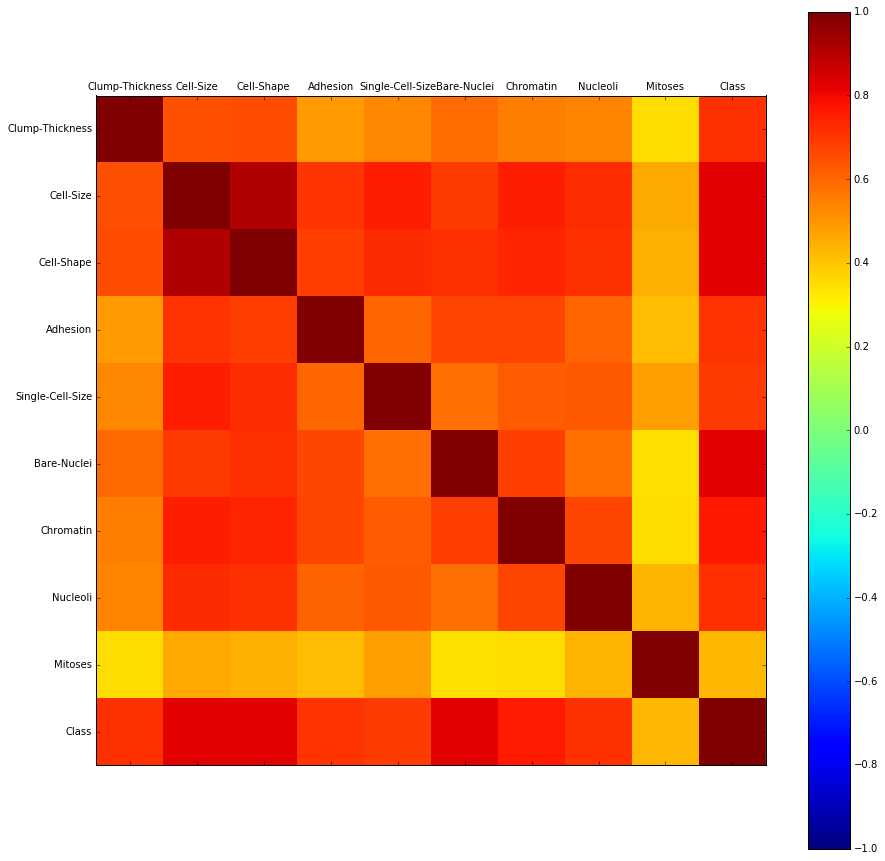

In [40]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names[1:11])
ax.set_yticklabels(names[1:11])
plt.show()

## 5.  Preparation

In [42]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
validation_size = 0.20
seed = 15
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [43]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

## 6. Learn models

In [49]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB())) # 여기서 데이터가 모두 실수, 실수 분포를 모두 가우스 분포로 가정해서 나이브베이지안을 모델링하겠다
models.append(('SVM', SVC()))
# 모델을 더 추가할 수도 있다

In [52]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              presort=False, random_state=None, splitter='best')),
 ('NB', GaussianNB()),
 ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,

In [53]:
results = []
names = []
# 이렇게 모든 알고리즘에 대해 for문을 한꺼번에 돌릴 수 있다. (sycilearn의 장점)
for name, model in models:
	kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
	cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.965219 (0.019105)
LDA: 0.963367 (0.018253)
KNN: 0.967071 (0.026935)
CART: 0.941414 (0.028060)
NB: 0.970741 (0.012114)
SVM: 0.963434 (0.019982)


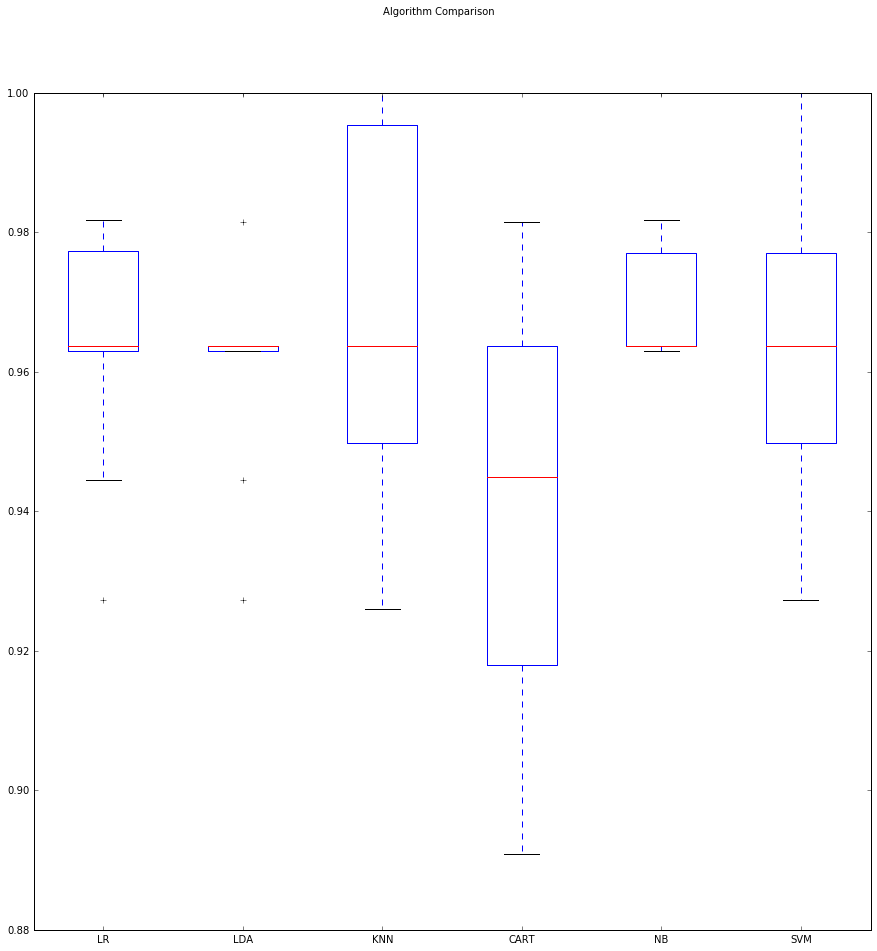

In [54]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


knn이 성능이 가장 높았을 때가 있다. 그리고 knn 편차가 크다. lda는 성능편차는 적지만, 성능자체가 안좋다. 

In [55]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScbaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

In [56]:
pipelines

[('ScaledLR',
  Pipeline(steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))])),
 ('ScaledLDA',
  Pipeline(steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001))])),
 ('ScaledKNN',
  Pipeline(steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform'))])),
 ('ScaledCART',
  Pipeline(steps=[('Scaler', StandardScaler(copy=True, wit

In [57]:
results = []
names = []
for name, model in pipelines:
	kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
	cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.967071 (0.017858)
ScaledLDA: 0.963367 (0.018253)
ScaledKNN: 0.968923 (0.024576)
ScaledCART: 0.934040 (0.029652)
ScaledNB: 0.970741 (0.012114)
ScbaledSVM: 0.968923 (0.020017)


svm은 scaling을 통해 편차가 줄어들었다.

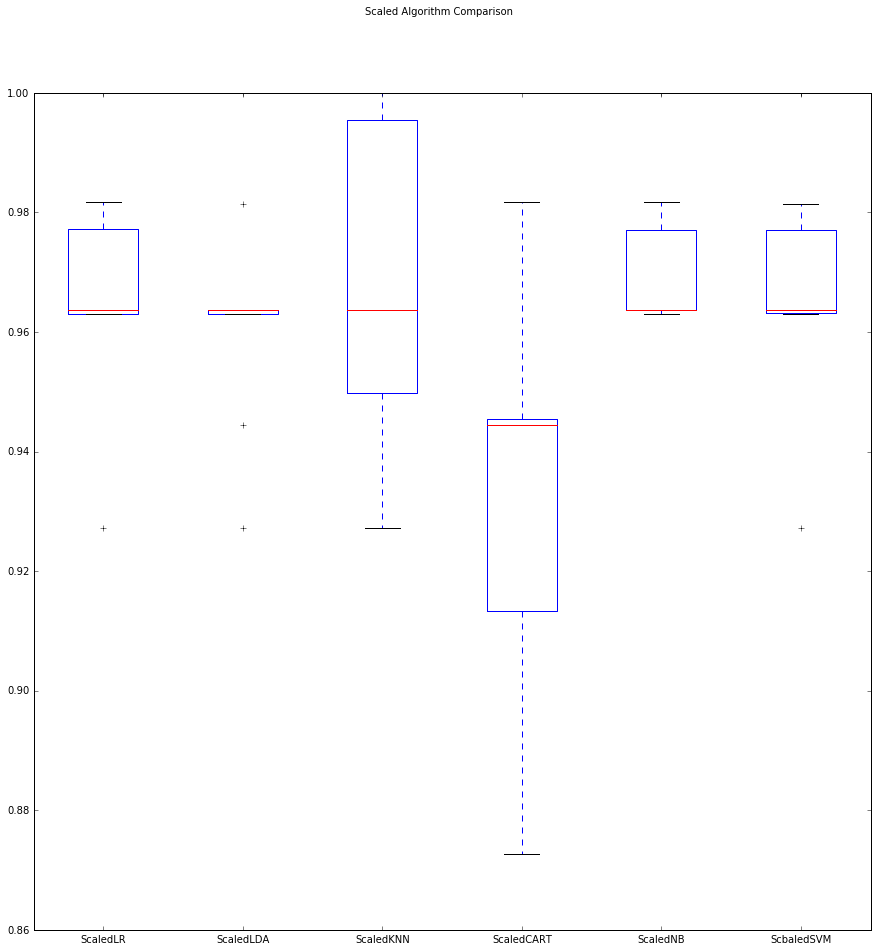

In [58]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [59]:
# Normalize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
	kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
	cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.968889 (0.020057)
ScaledLDA: 0.963367 (0.018253)
ScaledKNN: 0.967071 (0.026935)
ScaledCART: 0.941414 (0.017946)
ScaledNB: 0.970741 (0.012114)
ScaledSVM: 0.970707 (0.020321)


svn이 비약저으로 증가

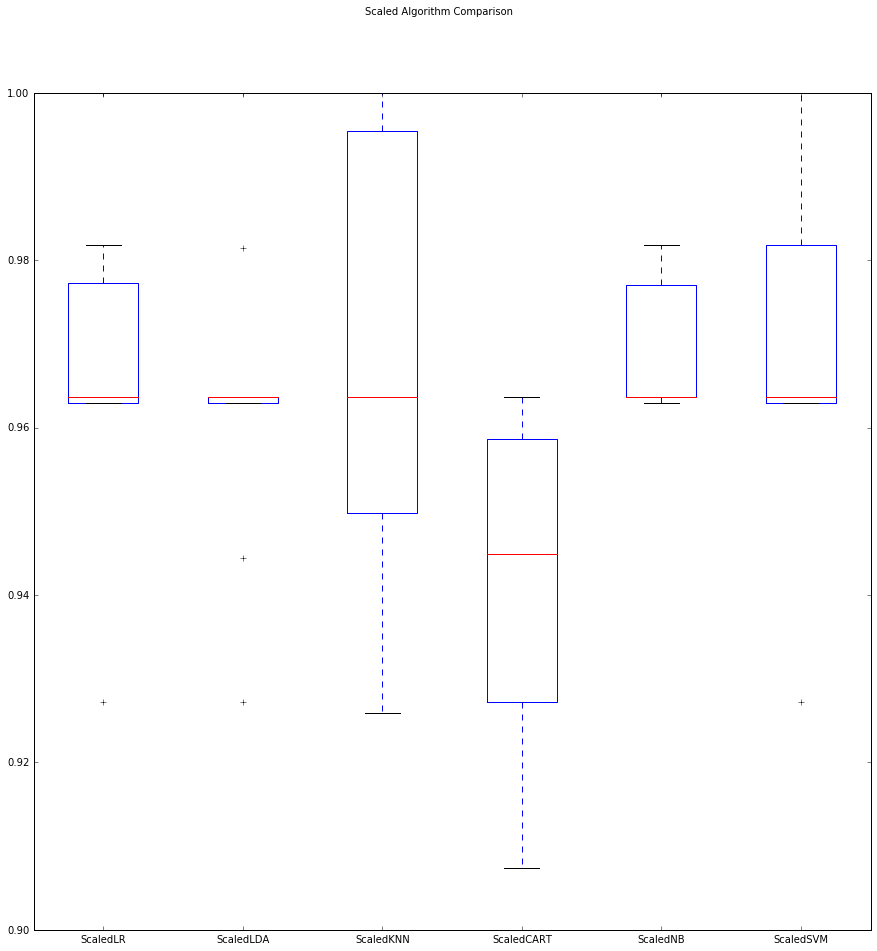

In [60]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [61]:
# Tune scaled-KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.972527 using {'n_neighbors': 11}
0.957912 (0.020114) with: {'n_neighbors': 1}
0.970741 (0.021961) with: {'n_neighbors': 3}
0.968923 (0.024576) with: {'n_neighbors': 5}
0.967037 (0.021391) with: {'n_neighbors': 7}
0.970741 (0.018577) with: {'n_neighbors': 9}
0.972525 (0.018732) with: {'n_neighbors': 11}
0.968889 (0.023120) with: {'n_neighbors': 13}
0.970707 (0.020321) with: {'n_neighbors': 15}
0.970707 (0.020321) with: {'n_neighbors': 17}
0.972525 (0.018732) with: {'n_neighbors': 19}
0.972525 (0.018732) with: {'n_neighbors': 21}


In [62]:
# Tune scaled-SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.972527 using {'kernel': 'rbf', 'C': 0.1}
0.970774 (0.018530) with: {'kernel': 'linear', 'C': 0.1}
0.930404 (0.025559) with: {'kernel': 'poly', 'C': 0.1}
0.972593 (0.020329) with: {'kernel': 'rbf', 'C': 0.1}
0.664781 (0.041287) with: {'kernel': 'sigmoid', 'C': 0.1}
0.970774 (0.018530) with: {'kernel': 'linear', 'C': 0.3}
0.945017 (0.023218) with: {'kernel': 'poly', 'C': 0.3}
0.970741 (0.020278) with: {'kernel': 'rbf', 'C': 0.3}
0.664781 (0.041287) with: {'kernel': 'sigmoid', 'C': 0.3}
0.970774 (0.018530) with: {'kernel': 'linear', 'C': 0.5}
0.950505 (0.028439) with: {'kernel': 'poly', 'C': 0.5}
0.970741 (0.020278) with: {'kernel': 'rbf', 'C': 0.5}
0.664781 (0.041287) with: {'kernel': 'sigmoid', 'C': 0.5}
0.970774 (0.018530) with: {'kernel': 'linear', 'C': 0.7}
0.956027 (0.028620) with: {'kernel': 'poly', 'C': 0.7}
0.970741 (0.020278) with: {'kernel': 'rbf', 'C': 0.7}
0.664781 (0.041287) with: {'kernel': 'sigmoid', 'C': 0.7}
0.970774 (0.018530) with: {'kernel': 'linear', 'C': 0.9

In [65]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
	kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
	cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.959731 (0.021450)
GBM: 0.961616 (0.023779)
RF: 0.957879 (0.016455)
ET: 0.968889 (0.020057)


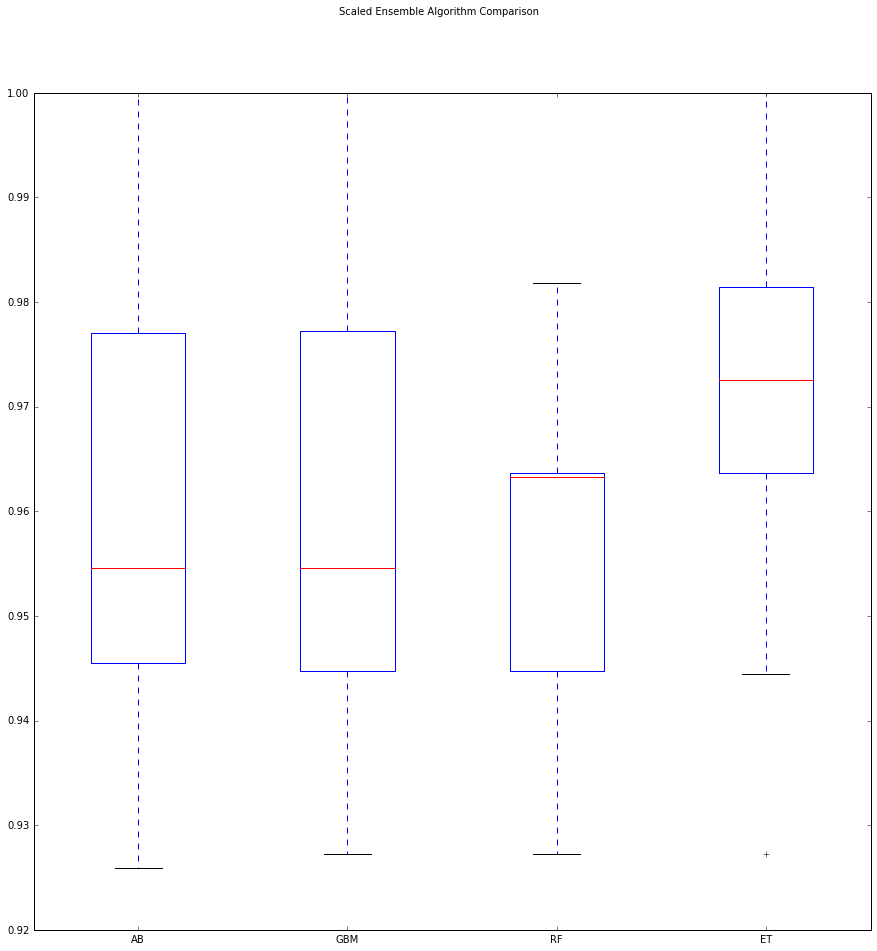

In [66]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()